In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Algorytm regresji logistycznej
Regresja logistyczna w swojej podstawowej formie jest w stanie przewidywać problemy binarne, tzn. takie, w których istnieje dwie możliwe wartości etykiet - typowo notowane jako 0 i 1. Metoda ta modeluje prawdopodobieństwo tego, że dany obiekt należy do klasy pozytywnej. W związku z tym, jesteśmy w stanie bazując na tym prawdopodobieństwie, dokonać przypisania obserwacji do jednej z dwóch klas.

Modelowanie odbywa się za pomocą dopasowania funkcji logistycznej w taki sposób, aby zmaksymalizować to prawdopodobieństwo dla przykładów ze zbioru treningowego.

W ogólności, wzór funkcji logistycznej ma następującą postać:

f(x) = L / 1 + e^(-k(x-x0))

gdzie:
* L - maksymalna wartość funkcji
* x0 - położenie środkowego punktu na osi **OX**
* k - współczynnik nachylenia krzywej

In [2]:
L = 1
x0 = 5
k = 1.5
x = np.linspace(0, 2 * x0, 1000)
y = L / (1 + np.exp(-k * (x - x0))) 

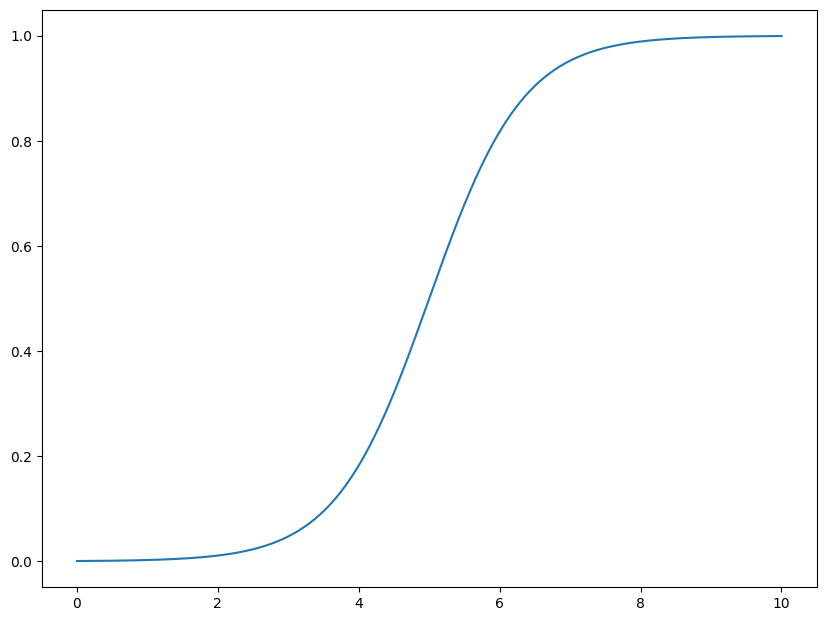

In [3]:
fig = plt.figure(figsize=(10.0, 7.5))
plt.plot(x, y)

### Nauczanie modelu regresji logistycznej
Stwórzmy sobie sztuczny zbiór danych, dla którego postaramy się nauczyć model regresji logistycznej.

In [5]:
import pandas as pd

In [6]:
x = np.geomspace(0.1, 10, 10)
y = (x > 5).astype(int)

xy_df = pd.DataFrame({'x': x, 'y': y})
xy_df

,x,y
0,0.100000,0
1,0.166810,0
2,0.278256,0
3,0.464159,0
4,0.774264,0
5,1.291550,0
6,2.154435,0
7,3.593814,0
8,5.994843,1
9,10.000000,1


<Axes: xlabel='x', ylabel='y'>

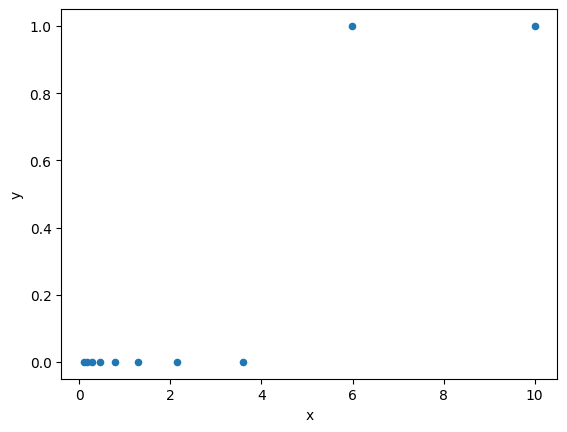

In [7]:
xy_df.plot.scatter(x="x", y="y")

In [8]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr = LogisticRegression(penalty=None, verbose=1)
lr.fit(xy_df[["x"]], xy_df["y"])

 This problem is unconstrained.


LogisticRegression(penalty=None, verbose=1)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  3.58578D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     20      1     0     0   4.277D-05   2.928D-05
  F =   2.9279536296426225E-005

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [12]:
lr.coef_, lr.intercept_

(array([[7.50788266]]), array([-35.3694675]))

In [13]:
test_x = np.linspace(0, 10, 1000).reshape(-1, 1)
probabilites = lr.predict_proba(test_x)
probabilites

/home/maciej/deep/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[1.00000000e+00, 4.35748035e-16],
       [1.00000000e+00, 4.69758229e-16],
       [1.00000000e+00, 5.06422923e-16],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

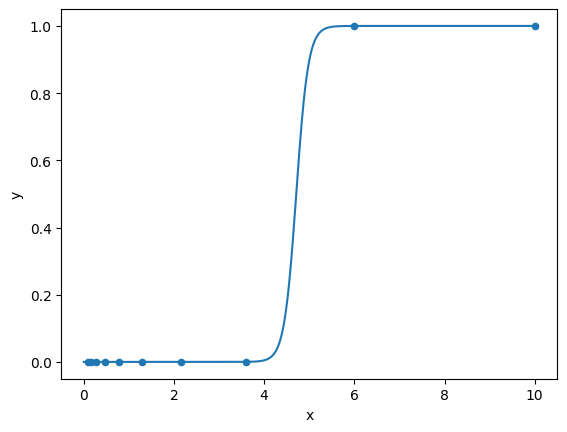

In [14]:
xy_df.plot.scatter(x="x", y="y")
plt.plot(test_x, probabilites[:, 1])

In [15]:
xy_df

,x,y
0,0.100000,0
1,0.166810,0
2,0.278256,0
3,0.464159,0
4,0.774264,0
5,1.291550,0
6,2.154435,0
7,3.593814,0
8,5.994843,1
9,10.000000,1


In [16]:
xy_df.at[3, "y"] = 1

In [17]:
lr = LogisticRegression(penalty=None, verbose=1, max_iter=11111)
lr.fit(xy_df[["x"]], xy_df["y"])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  4.04994D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     11      1     0     0   8.866D-05   3.988D-01
  F =  0.39876904295822219     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


LogisticRegression(max_iter=11111, penalty=None, verbose=1)

In [18]:
probabilites = lr.predict_proba(test_x)
probabilites

/home/maciej/deep/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.91889828, 0.08110172],
       [0.91846683, 0.08153317],
       [0.91803329, 0.08196671],
       ...,
       [0.03453796, 0.96546204],
       [0.03434589, 0.96565411],
       [0.03415486, 0.96584514]])

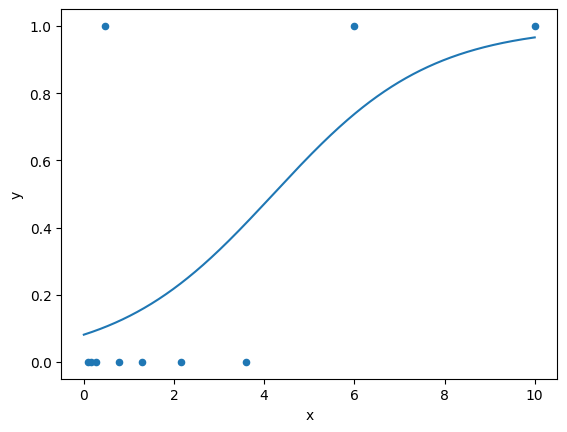

In [19]:
xy_df.plot.scatter(x="x", y="y")
plt.plot(test_x, probabilites[:, 1])

In [20]:
lr.coef_, lr.intercept_

(array([[0.57695698]]), array([-2.4274712]))

In [21]:
lr.predict(xy_df[["x"]])

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])